## Exploration

In this dataset there are 125 predictive, 4 non-predictive, and 18 potential goal features. There are 2215 samples included. For the independent features (125), there are 41185 missing values; 41184 of these missing values came from features pertaining to police related statistics. Of the potential dependent features, there were 962 missing values.

Then 14.87% of the data is missing, while only 2.413% of the labels are missing.

One categorial variable ('state') exists.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn import set_config
from sklearn.linear_model import SGDRegressor

dataRaw = pd.read_csv('CommViolPredUnnormalizedData.txt',names=["communityname", "state", "countyCode", "communityCode", "fold", "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par","PctYoungKids2Par","PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumKidsBornNeverMar", "PctKidsBornNeverMar", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "OwnOccQrange", "RentLowQ", "RentMedian", "RentHighQ", "RentQrange", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85","PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "murders", "murdPerPop", "rapes", "rapesPerPop", "robberies", "robbbPerPop", "assaults", "assaultPerPop", "burglaries", "burglPerPop", "larcenies", "larcPerPop", "autoTheft", "autoTheftPerPop", "arsons", "arsonsPerPop", "ViolentCrimesPerPop", "nonViolPerPop"], na_values='?')
dataRaw

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,NaN,NaN,10,56216,3.07,6.87,61.68,15.23,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,10,12251,2.68,21.18,76.65,1.52,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
2212,Yucaipacity,CA,NaN,NaN,10,32824,2.46,0.52,92.62,0.98,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20
2213,Beevillecity,TX,NaN,NaN,10,13547,2.89,3.37,69.91,0.90,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.0,7.85,691.17,5340.87


<AxesSubplot:title={'center':'# of Samples per State'}, xlabel='State', ylabel='Number of Samples'>

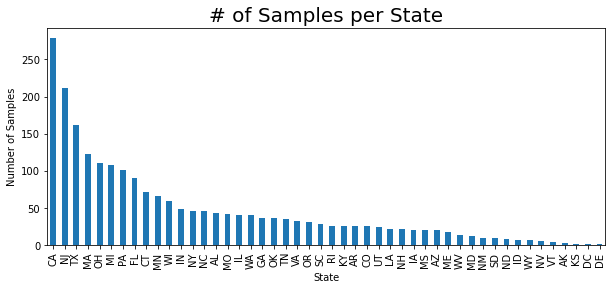

In [2]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel('State', fontsize = 10)
ax.set_ylabel('Number of Samples', fontsize = 10)
ax.set_title('# of Samples per State', fontsize = 20)
dataRaw['state'].value_counts().plot(ax=ax,kind='bar')

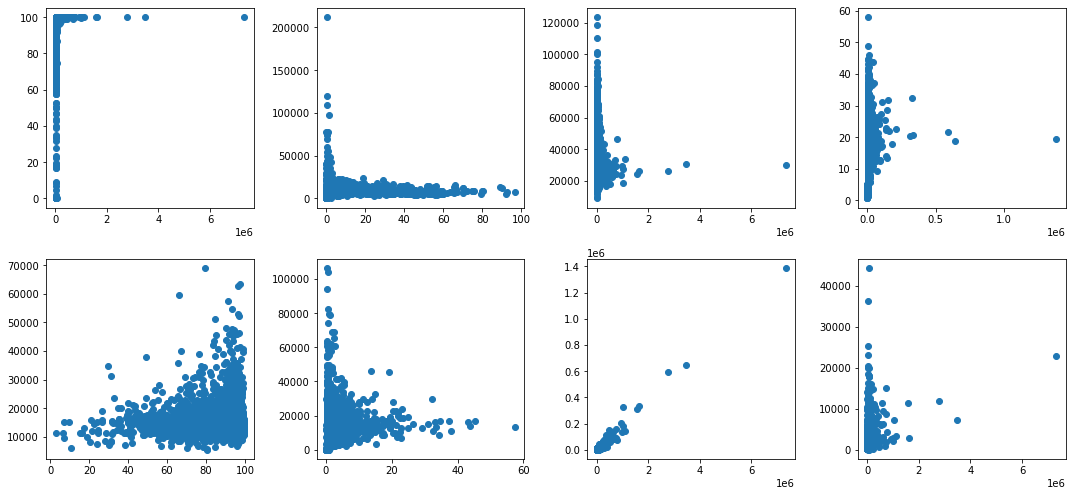

In [3]:
fig, ax = plt.subplots(2,4,figsize=(15,7))
ax[0,0].scatter(dataRaw['population'], dataRaw['pctUrban'])
ax[0,1].scatter(dataRaw['racepctblack'], dataRaw['blackPerCap'])
ax[1,0].scatter(dataRaw['racePctWhite'], dataRaw['whitePerCap'])
ax[1,1].scatter(dataRaw['racePctAsian'], dataRaw['AsianPerCap'])
ax[0,2].scatter(dataRaw['population'], dataRaw['medIncome'])
ax[1,2].scatter(dataRaw['population'], dataRaw['NumUnderPov'])
ax[0,3].scatter(dataRaw['NumUnderPov'], dataRaw['PctPopUnderPov'])
ax[1,3].scatter(dataRaw['population'], dataRaw['PopDens'])
fig.tight_layout()

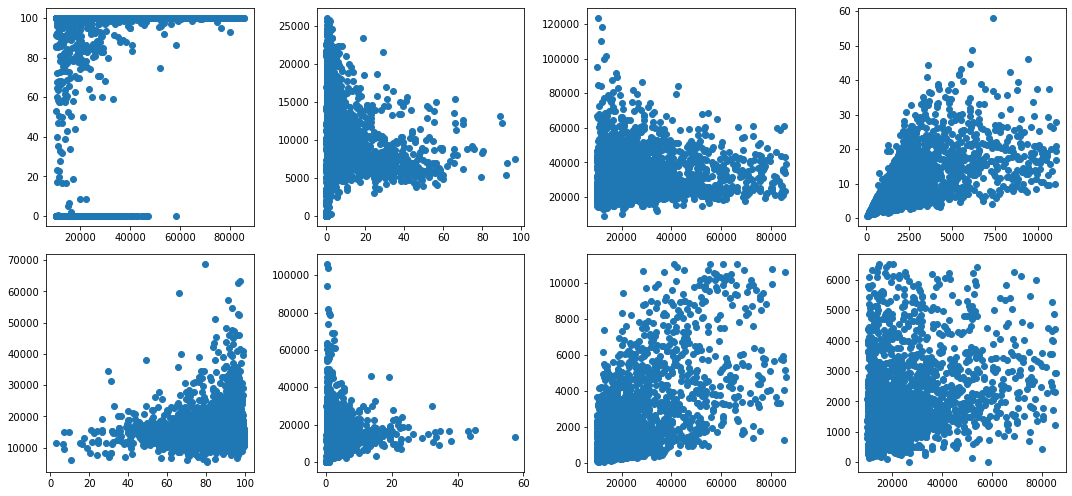

In [4]:
temp = dataRaw
for x in ['NumUnderPov']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
for x in ['population']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
for x in ['blackPerCap']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
for x in ['PopDens']:
    q75,q25 = np.percentile(temp.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    temp.loc[temp[x] < min,x] = np.nan
    temp.loc[temp[x] > max,x] = np.nan
    
fig, ax = plt.subplots(2,4,figsize=(15,7))
ax[0,0].scatter(temp['population'], temp['pctUrban'])
ax[0,1].scatter(temp['racepctblack'], temp['blackPerCap'])
ax[1,0].scatter(temp['racePctWhite'], temp['whitePerCap'])
ax[1,1].scatter(temp['racePctAsian'], temp['AsianPerCap'])
ax[0,2].scatter(temp['population'], temp['medIncome'])
ax[1,2].scatter(temp['population'], temp['NumUnderPov'])
ax[0,3].scatter(temp['NumUnderPov'], temp['PctPopUnderPov'])
ax[1,3].scatter(temp['population'], temp['PopDens'])
fig.tight_layout()

Above are 2 sets of scatter plots that show the relationship between the same pairs of features. Scatter plots of the raw data do not show that much correlation, but after removing outliers, it is easy to see on the second set of scatter plots that there exists correlation among many of the features.

## Pre-processing

First we separate the data into the data(X) and labels(Y). In addition, the dataset contains 4 non-predictive attributes (communityname, countyCode, communityCOde, and fold). Because the 'state' attribute is nominal, I will label encode that attribute before adding it back to the other data

In [5]:
dataY = dataRaw[['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop']]
dataX = dataRaw[["population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par","PctYoungKids2Par","PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumKidsBornNeverMar", "PctKidsBornNeverMar", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "OwnOccQrange", "RentLowQ", "RentMedian", "RentHighQ", "RentQrange", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85","PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop"]]
dataX.shape

(2215, 124)

Next, we must fill in the missing values. The mode would probably be more appropriate in this case than mean because the data has a large range for most attributes. Because the missing values are denoted with a '?' we have to replace it with NaN. We did this above while reading in the data from the text file.

In [6]:
imputer = SimpleImputer(fill_value=np.nan, strategy='median')
dataX1 = imputer.fit_transform(dataX)
dataX1 = pd.DataFrame(dataX1, columns = dataX.columns)
dataY1 = imputer.fit_transform(dataY)
dataY1 = pd.DataFrame(dataY1, columns = dataY.columns)

In [7]:
append = dataRaw[['state']]
dataX1 = dataX1.join(append) #adding back 'state' since it would interfere with SimpleImputer; its entries are non-numerical

# Now we can convert the categorial values of 'state' to numerical values
l1 = LabelEncoder()
l1.fit(dataX1['state'])
dataX1.state = l1.transform(dataX1.state)

Lastly, we normalize the dataset because normalized data allows machine learning models to perform in an optimal manner. Normalization is the process of changing the values to a common scale such that the difference in range of values isn't distorted.

Also, we choose murders to be the label we are trying to predict.

In [8]:
# normalization
ss = StandardScaler()
dataX1.iloc[:,0:125] = ss.fit_transform(dataX1.iloc[:,0:125])

# select murders as the label
dataY2 = dataY1['murders']

## Feature Learning/Extraction

I chose PCA as opposed to other techniques because there are many features that could possibly have correlation to each other: for example, there exists several features about race that could have correlation and several features pertaining to homes that could have correlation. Thus, because the goal of PCA is to reduce the dataset into a combination of uncorrelated variables, I believe it is a good technique to implement on this dataset. A good variance is high (between 95%-99%) so I will choose 95%.

In [9]:
pca = PCA(n_components = 0.95)
dataX1pca = pca.fit_transform(dataX1)
dataX1df = pd.DataFrame(dataX1pca, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27','pc28','pc29','pc30','pc31','pc32','pc33','pc34','pc35','pc36','pc37','pc38','pc39','pc40','pc41','pc42','pc43','pc44','pc45','pc46'])

For a variance of 95%, 46 components were created through PCA.

## Machine Learning Methods

We can now implement the two machine learning methods. 

The first method I will implement is a random forest regressor; this essentially uses a number of decision trees on different sub-samples of the dataset and uses averaging of all outputs to improve the accuracy. By using a higher number of decision trees, the ouput will not have to depend on a lower number of trees, which will decrease variance. 

The second method, stochastic gradient descent regressor; SGD takes one input for each iteration and improves accuracy by iterating more.

### Random Forest Regressor

R-squared: 0.9625615691668067
MSE:  3584.067562528217
RMSE:  1792.0337812641085


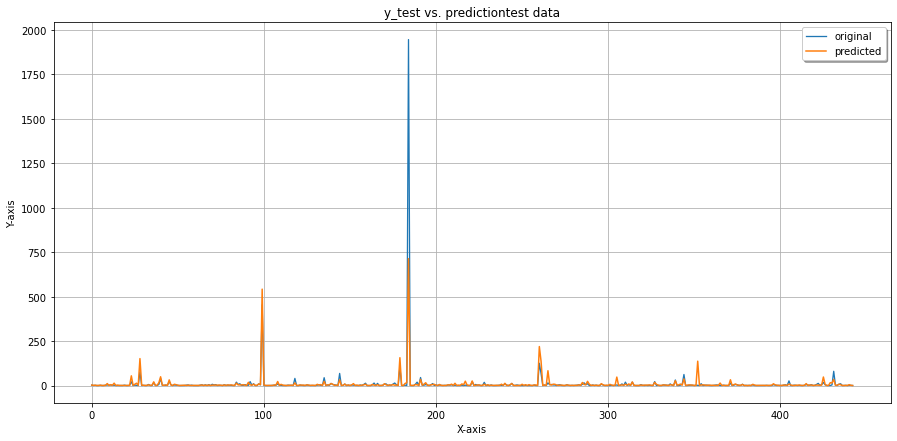

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataX1df, dataY2, test_size = 0.2) #splitting into test/train

rfr = RandomForestRegressor().fit(X_train,y_train) # training model
score = rfr.score(X_train,y_train)
print("R-squared:", score)

predictiontest = rfr.predict(X_test) # testing model
mse = mean_squared_error(y_test,predictiontest)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test)) # comparing test labels with predicted 
plt.figure(figsize=(15,7))
plt.plot(x_ax, y_test, linewidth=1.3, label="original")
plt.plot(x_ax, predictiontest, linewidth=1.5, label="predicted")
plt.title("y_test vs. predictiontest data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Stochastic Gradient Descent Regressor

R-squared: 0.9073148529968132
CV mean score:  -32186616.88441401
MSE:  3584.067562528217
RMSE:  1792.0337812641085


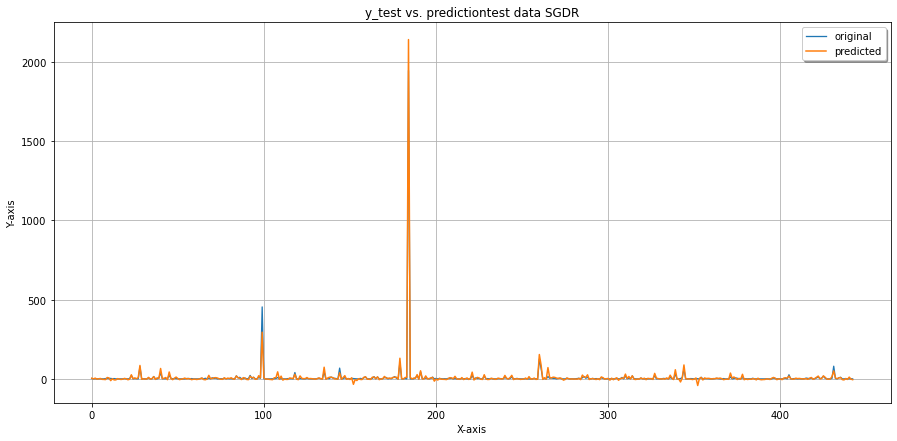

In [11]:
sgdr = SGDRegressor().fit(X_train,y_train)
score = sgdr.score(X_train,y_train)
print("R-squared:", score)
cv_score = cross_val_score(sgdr, dataX1, dataY2, cv = 10)
print("CV mean score: ", cv_score.mean())

predictiontest1 = sgdr.predict(X_test) # testing model
mse = mean_squared_error(y_test,predictiontest1)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test)) # comparing test labels with predicted 
plt.figure(figsize=(15,7))
plt.plot(x_ax, y_test, linewidth=1.3, label="original")
plt.plot(x_ax, predictiontest1, linewidth=1.5, label="predicted")
plt.title("y_test vs. predictiontest data SGDR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Comparative Analysis

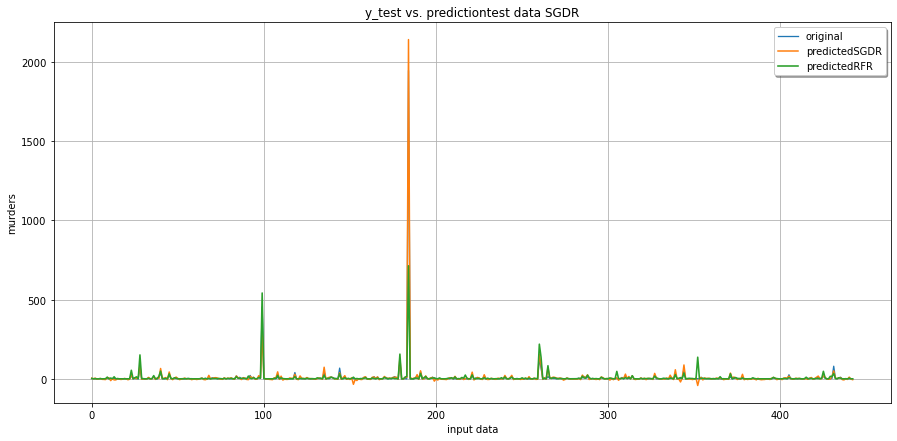

In [14]:
x_ax = range(len(y_test)) # comparing test labels with predicted 
plt.figure(figsize=(15,7))
plt.plot(x_ax, y_test, linewidth=1.3, label="original")
plt.plot(x_ax, predictiontest1, linewidth=1.5, label="predictedSGDR")
plt.plot(x_ax, predictiontest, linewidth=1.6, label="predictedRFR")
plt.title("y_test vs. predictiontest data SGDR")
plt.xlabel('input data')
plt.ylabel('murders')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

As we can see with the overlayed plots, the random forest regressor appears to have performed significantly better than the stochastic gradient descent regressor. While the SGDR still performed relatively well (0.907), we can see that SGDR overshot predictions, while RFR predicitons were typically more conservative, but then more accurate.